In [1]:
import numpy as np
import pandas as pd

In [2]:
##########################################################
# data preprocessing
#first, read the csv
resumeSkillsData_psu = pd.read_csv('resumeSkillsData_psu.csv')
resumeSkillsData_pva = pd.read_csv('resumeSkillsData_pva.csv')

In [3]:
#we have resume skill data of two school, so we need to append it first
skill = resumeSkillsData_psu.append(resumeSkillsData_pva, sort=False,ignore_index=True)
skill = skill.drop(skill.columns[0], axis=1)

In [4]:
#let's take a look of skill data tables
skill.head()

,ownerUserID,skillTagsID,expDescription,1,2,4,5,7,8,10,...,13,14,15,18,19,20,39,48,52,school
0,356.0,"5,11,15",I joined the Greek system during my sophomore ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,psu
1,356.0,"7,18",THON is the largest run student philanthropy i...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,psu
2,356.0,"7,5,8,10","I have been a waitress at The Tavern, a State ...",0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,psu
3,2485.0,"7,11,14",While playing soccer has always been a fun way...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,psu
4,2453.0,"7,2,4,4",Test Entry,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,psu


In [5]:
#the 0/1 label is float, we change it to int
skill = skill.astype({"ownerUserID":int,"1": int, "2": int, "4":int, "5":int, "7":int, "8":int, "10":int,
                      "11":int, "12":int, "13":int, "14":int, "15":int, "18":int, "19":int, "20":int, "39":int,
                      "48":int, "52":int})

In [9]:
#let's check if the 0 and 1 is balenced
#first let's look at the size of our table
len(skill)

4942

In [10]:
skills = ['1','2','4','5','7','8','10','11','12','13','14','15','18','19','20','39','48','52']
skill[skills].sum()

1      179
2      625
4     1609
5       52
7     1057
8     1519
10    1190
11    1915
12     364
13      10
14     501
15     294
18    1064
19    1781
20     956
39       1
48       1
52       2
dtype: int64

In [11]:
skill_distribution = skill[skills]

In [12]:
skill_distribution['label']='for_groupby'
skill_distribution

<ipython-input-12-6c25ac11da59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_distribution['label']='for_groupby'


,1,2,4,5,7,8,10,11,12,13,14,15,18,19,20,39,48,52,label
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,for_groupby
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,for_groupby
2,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,for_groupby
3,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,for_groupby
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,for_groupby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,for_groupby
4938,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,for_groupby
4939,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,for_groupby
4940,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,for_groupby


In [13]:
skill_distribution = pd.read_csv('sd.csv')

In [14]:
skill_distribution=skill_distribution.set_index('cols')

Text(0, 0.5, 'count')

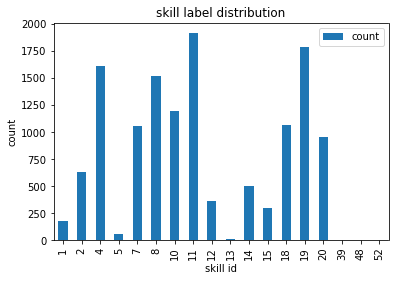

In [15]:
import matplotlib.pyplot as plt
skill_distribution.plot(kind="bar")
plt.title("skill label distribution")
plt.xlabel("skill id")
plt.ylabel("count")

In [16]:
#Because there are 0 and 1 under each skill, 0 represent this sentence shows that people do not have that skill,
#while 1 show they have. So I use sum to represent the number of 1 in each skill column.
#There are 9311 rows, but we can see, there are many skills only contain very few "1". So we filter it, 
#We drop table whose sum less than 2000
skill = skill.drop(['skillTagsID','1', '2','5','7','12','13','14','15','18','20','39','48','52'], axis = 1)

In [17]:
#we find there are many <p> in the data table, we need to clean it.
skill.tail()

,ownerID,expDescription,4,8,10,11,19,school
4937,4613,<p>In this project i thought abuot a financial...,0,0,0,0,1,pva
4938,4636,<p>I chose 3 different colleges that I could g...,0,0,0,0,1,pva
4939,4668,"<p>For this project, we had to obtain a credit...",0,1,0,0,0,pva
4940,4613,"<p>in this project, we were given successful e...",0,1,0,0,0,pva
4941,4636,"<p>In this project, I created a budget for my ...",0,0,0,0,0,pva


In [18]:
skill['expDescription'].map(len).max()

32767

In [19]:
number_rows = len(skill)
total_length= 0
for i in range(len(skill)):
    lent= 0
    lent = len(str(skill['expDescription'][i]))
    total_length = total_length+lent
total_length/number_rows

1708.1011736139214

In [20]:
import re
import string

def data_clean(txt):
    txt = txt.lower()#Make text lowercase
    txt = re.sub('<[^>]*>', '', txt)#remove html tags
    txt = re.sub('\n', ' ', txt)#remove /n
    txt = re.sub('\r', '', txt)#remove /r.
    return txt

In [21]:
#apply the data cleaning function
data_cleaning = lambda x: data_clean(x)
skill['expDescription'] = skill['expDescription'].apply(data_cleaning)

In [22]:
skill['expDescription'].map(len).max()

7783

In [23]:
number_rows = len(skill)
total_length= 0
for i in range(len(skill)):
    lent= 0
    lent = len(str(skill['expDescription'][i]))
    total_length = total_length+lent
total_length/number_rows

826.4544718737353

In [24]:
skill.tail()

,ownerID,expDescription,4,8,10,11,19,school
4937,4613,in this project i thought abuot a financial de...,0,0,0,0,1,pva
4938,4636,i chose 3 different colleges that i could go t...,0,0,0,0,1,pva
4939,4668,"for this project, we had to obtain a credit ca...",0,1,0,0,0,pva
4940,4613,"in this project, we were given successful entr...",0,1,0,0,0,pva
4941,4636,"in this project, i created a budget for my ide...",0,0,0,0,0,pva


In [25]:
skill.to_csv("ready_for_model.csv")

In [26]:
###################################################################################################################
###################################################################################################################
#start modeling

In [27]:
from sklearn.metrics import  roc_auc_score
import tensorflow as tf
from keras.models import Model,Sequential
from keras.layers import Dense,Embedding, Input , Activation
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras import initializers, optimizers, layers

In [28]:
#We split the dataset to train and test set by 4:1
from sklearn.model_selection import train_test_split
train, test = train_test_split(skill,test_size = 0.2)

In [29]:
#we can see, the distribution of 1 and 0 are close to 1:1.
len(train)

3953

In [30]:
# it is a balanced training data
selected_skills = ['4','8','10','11','19']
train[selected_skills].sum()

4     1287
8     1201
10     968
11    1524
19    1443
dtype: int64

In [31]:
#get y value(labels) for training and evaluation
y_train = train[selected_skills].values
y_test = test[selected_skills].values

In [32]:
#prepare for the tokenization
train_text = train['expDescription']
test_text = test['expDescription']

In [33]:
# In this step, we will tokenize sentence
# for the encoding technique, I learned from 
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 30000
tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
train_text = list(train_text)

tokenizer.fit_on_texts(train_text)

tokenized_train = tokenizer.texts_to_sequences(train_text)
tokenized_test = tokenizer.texts_to_sequences(test_text)
#pad sentence
maxlen = 1000
x_train = pad_sequences(tokenized_train, maxlen = maxlen)
x_test = pad_sequences(tokenized_test, maxlen = maxlen)

In [34]:
#learned how to build bi-lstm model by 
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#and https://keras.io/api/layers/recurrent_layers/bidirectional/
model = Sequential()
model.add(Embedding(30000, 256, input_length = maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True,recurrent_dropout = 0.15), input_shape=(maxlen,)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
from keras.callbacks import ModelCheckpoint
file_path = 'savebest'
checkpoint = ModelCheckpoint(file_path, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [36]:
#use training data to train the model,We have saved the model outside, so we can just load the model
batch_size = 5
epochs = 10
#model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks = checkpoint)

In [37]:
from keras.models import load_model
model = load_model("batchsize_5_model")

In [38]:
#use the model to predict the test set
prediction = model.predict(x_test)
prediction

array([[0.53632516, 0.48785865, 0.38696486, 0.40394264, 0.3607946 ],
       [0.1577999 , 0.3053816 , 0.26429522, 0.25604534, 0.2928207 ],
       [0.31501502, 0.417786  , 0.33980983, 0.37685418, 0.35363656],
       ...,
       [0.34128225, 0.4307354 , 0.43051934, 0.4416003 , 0.42961493],
       [0.18545619, 0.2168786 , 0.17841658, 0.5759756 , 0.39403623],
       [0.13193804, 0.23469296, 0.2889275 , 0.55822235, 0.5027247 ]],
      dtype=float32)

In [39]:
#convert predction to pandas dataframe for future converting
pred = pd.DataFrame(prediction, columns=
                    ['4','8','10','11','19'])

In [40]:
#convert y_test value to pandas dataframe for future converting
y_test_data_table = pd.DataFrame(y_test, columns=['4','8','10','11','19'])

In [41]:
from sklearn.metrics import accuracy_score
#first, let's calculate the accuracy of skill 8, which is 'creative thinking'
skill_4_pred = pred["4"].to_numpy()
skill_4_true = y_test_data_table["4"].to_numpy()
accuracy_score(skill_4_true, skill_4_pred.round())

0.6531850353892821

In [42]:
from sklearn.metrics import confusion_matrix
cm_4=confusion_matrix(skill_4_true, skill_4_pred.round())
cm_4

array([[631,  36],
       [307,  15]])

In [43]:
#then, let's calculate the accuracy of skill 8, which is 'problem solving'
skill_8_pred = pred["8"].to_numpy()
skill_8_true = y_test_data_table["8"].to_numpy()
accuracy_score(skill_8_true, skill_8_pred.round())

0.6612740141557129

In [44]:
cm_8=confusion_matrix(skill_8_true, skill_8_pred.round())
cm_8

array([[636,  35],
       [300,  18]])

In [45]:
#thirdly, let's calculate the accuracy of skill 10, which is 'adapt ability'
skill_10_pred = pred["10"].to_numpy()
skill_10_true = y_test_data_table["10"].to_numpy()
accuracy_score(skill_10_true, skill_10_pred.round())

0.775530839231547

In [46]:
cm_10=confusion_matrix(skill_10_true, skill_10_pred.round())
cm_10

array([[767,   0],
       [222,   0]])

In [47]:
#after that, let's calculate the accuracy of skill 11, which is 'team work'
skill_11_pred = pred["11"].to_numpy()
skill_11_true = y_test_data_table["11"].to_numpy()
accuracy_score(skill_11_true, skill_11_pred.round())

0.58948432760364

In [48]:
cm_11=confusion_matrix(skill_11_true, skill_11_pred.round())
cm_11

array([[448, 150],
       [256, 135]])

In [49]:
#finally, let's calculate the accuracy of skill 19, which is 'communication'
skill_19_pred = pred["19"].to_numpy()
skill_19_true = y_test_data_table["19"].to_numpy()
accuracy_score(skill_19_true, skill_19_pred.round())

0.6329625884732053

In [50]:
cm_19=confusion_matrix(skill_19_true, skill_19_pred.round())
cm_19

array([[562,  89],
       [274,  64]])

In [51]:
model.save("batchsize_5_model")

INFO:tensorflow:Assets written to: batchsize_5_model/assets


In [52]:
skills=['creative thinking','problem solving','adaptability','team work','communication']

In [53]:
def classify(input):
    tokenizer.fit_on_texts(input)
    tokenized_input = tokenizer.texts_to_sequences([input])
    input_seq = pad_sequences(tokenized_input, maxlen)
    prediction = model.predict(input_seq)
    skill = []

    for i,skill_name in enumerate(skills):
        skill_prob = prediction[0][i]
        if skill_prob >0.5:
            skill.append(skill_name)  
  
    return skill

In [60]:
y = classify("hi, my major is applied data science, I want to test the classifier")
y

[]

In [61]:
x = classify("I have an internship in xxxx company, I learned a lot from there")
x

['team work']